# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [628]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import re

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [629]:
print("Фиксация сидов  в начале гарантирует воспроизводимость сценария: при каждом его запуске будут создаваться одни и те же  рандомные числа и следовательно получаться одни и те же результаты.")

Фиксация сидов  в начале гарантирует воспроизводимость сценария: при каждом его запуске будут создаваться одни и те же  рандомные числа и следовательно получаться одни и те же результаты.


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [630]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [631]:
df_train.sample(n = 10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [632]:
df_test.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


In [633]:

df_test.tail(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [634]:
print("Train:")
df_train.describe(include = ['object', 'float', 'int'])

Train:


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,6999,6999.000000,6.999000e+03,6.999000e+03,6999,6999,6999,6999,6797,6797,6803,6796,6797.000000
unique,1924,NaN,NaN,NaN,4,3,2,5,386,120,316,419,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,116,NaN,NaN,NaN,3793,5826,6095,4587,197,885,330,468,NaN
mean,NaN,2013.818403,6.395152e+05,6.958462e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.419008
std,NaN,4.053095,8.089419e+05,5.772400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.965767
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.700000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [635]:
print("В следующих колонках есть пропуски:\n")
for (columnName, columnData) in df_train.items():
    if df_train[columnName].isna().sum() != 0:
        print(columnName)

В следующих колонках есть пропуски:

mileage
engine
max_power
torque
seats


(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [636]:
df_train_no_target = df_train.loc[:, df_train.columns != 'selling_price']
df_train_dedupe = df_train_no_target.drop_duplicates()
print("Число объектов с одинаковым признаковым описанием: ", (len(df_train) - len(df_train_dedupe)))

Число объектов с одинаковым признаковым описанием:  1159


(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [637]:
df_duplicates = pd.merge(df_train_no_target, df_train_dedupe)

df_duplicates.head()

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0


In [638]:
df_duplicates.shape

(6999, 12)

(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [639]:
# remove sellling_price from the list of columns
columns_subset = df_train.columns
columns_subset = columns_subset.delete(2)
columns_subset

# drop rows while keeping the first occurance
df_train = df_train.drop_duplicates(subset=columns_subset, keep='first')

In [640]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [641]:
df_train = df_train.reset_index(drop=True)

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

In [642]:
def test_apply(x):
    try:
        return float(x)
    except ValueError:
        return None

def clean_mileage(df):
    df['mileage'] = df['mileage'].astype(str)
    df['mileage'] = df['mileage'].map(lambda x: x.rstrip(' kmpl'))
    df['mileage'] = df['mileage'].map(lambda x: x.rstrip(' km/kg'))
    
    df['mileage'] = df['mileage'].apply(test_apply)
    
    return df

def clean_engine(df):
    df['engine'] = df['engine'].astype(str)
    df['engine'] = df['engine'].map(lambda x: x.rstrip(' C'))
    
    df['engine'] = df['engine'].apply(test_apply)
    
    return df

def clean_max_power(df):
    df['max_power'] = df['max_power'].astype(str)
    df['max_power'] = df['max_power'].map(lambda x: x.rstrip(' bhp'))

    # cast string to float
    df['max_power'] = df['max_power'].apply(test_apply)

    return df

# clean df_train
df_train = clean_mileage(df_train)
df_train = clean_engine(df_train)
df_train = clean_max_power(df_train)

# clean df_test
df_test = clean_mileage(df_test)
df_test = clean_engine(df_test)
df_test = clean_max_power(df_test)

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [643]:
def groom_rpm(df):
    df['max_torque_rpm'] = df['max_torque_rpm'].astype(str)

    # clean to the right
    df['max_torque_rpm'] = df['max_torque_rpm'].map(lambda x: x.rstrip('rpm'))
    df['max_torque_rpm'] = df['max_torque_rpm'].map(lambda x: x.rstrip('RPM'))
    df['max_torque_rpm'] = df['max_torque_rpm'].map(lambda x: x.rstrip('(kgm@ rpm)'))

    # clean to the left
    df['max_torque_rpm'] = df['max_torque_rpm'].map(lambda x: x.lstrip('kKgGmM at '))
    df['max_torque_rpm'] = df['max_torque_rpm'].map(lambda x: x.lstrip('Nm at /'))

    # iterate over column values
    for i in range(0, len(df['max_torque_rpm'])):
        # remove commas
        df.loc[i, ['max_torque_rpm']] = df['max_torque_rpm'][i].replace(',', '')
        
        # replace None/na with NaN
        if df['max_torque_rpm'][i] == 'None' or df['max_torque_rpm'][i] == 'na':
            df.loc[i, ['max_torque_rpm']] = 'NaN'
        
        # special case
        if df['max_torque_rpm'][i] == 'one':
            df.loc[i, ['max_torque_rpm']] = 'NaN'
            
        # for rpm set in format 4000+/-500rpm let's use the main part (4000) because it's the average of 3500 and 4500
        if '+/-' in df['max_torque_rpm'][i]:
            elements = df['max_torque_rpm'][i].split('+/-')
            predicted_range = float(elements[0])
            df.loc[i, ['max_torque_rpm']] = str(predicted_range)
        # if rpm is set in range 1400-2200 then let's use the average value
        elif '-' in df['max_torque_rpm'][i] or  '~' in df['max_torque_rpm'][i]:
            elements = re.split('-|~', df['max_torque_rpm'][i])
            range_begin = float(elements[0])
            range_end = float(elements[1])
            
            new_range = (range_begin + range_end) / 2
            df.loc[i, ['max_torque_rpm']] = str(new_range)

    # cast string to float
    df['max_torque_rpm'] = df['max_torque_rpm'].apply(test_apply)
    
    return df

def groom_torque(df):
    df['torque'] = df['torque'].astype(str)

    # clean to the right
    df['torque'] = df['torque'].map(lambda x: x.rstrip('nNmM@'))

    # iterate over column values
    for i in range(0, len(df['torque'])):
        
        # replace na with NaN
        if df['torque'][i] == 'na' or df['torque'][i] == 'Na':
            df.loc[i, ['torque']] = 'NaN'
        
        # replace weird kg with NaN because we can't convert Nm <-> kg (although we can do Nm <-> kgm conversion)
        if 'kg' in df['torque'][i]:
            df.loc[i, ['torque']] = 'NaN'

    # cast string to float
    df['torque'] = df['torque'].apply(test_apply)
    
    return df

def split_torque(df):
    # split original torque column in two columns: torque_new, max_torque_rpm
    df[['torque_new', 'max_torque_rpm']] = df['torque'].str.split(' ', n=1, expand=True)

    # drop the original torque column
    df = df.drop('torque', axis=1)

    # rename torque_new -> torque
    df = df.rename(columns = {'torque_new':'torque'})
    
    # let's groom torque
    df = groom_torque(df)
    
    # let's groom rpm
    df = groom_rpm(df)
    
    return df

# split toqrue in train
df_train = split_torque(df_train)

In [644]:

# split toqrue in test
df_test = split_torque(df_test)

(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [650]:

# torque
median = df_train['torque'].median()
df_train['torque'].fillna(median, inplace=True)
df_test['torque'].fillna(median, inplace=True)

assert df_train['torque'].isna().sum() == 0
assert df_test['torque'].isna().sum() == 0

# max_torque_rpm
median = df_train['max_torque_rpm'].median()
df_train['max_torque_rpm'].fillna(median, inplace=True)
df_test['max_torque_rpm'].fillna(median, inplace=True)

assert df_train['max_torque_rpm'].isna().sum() == 0
assert df_test['max_torque_rpm'].isna().sum() == 0

# mileage
median = df_train['mileage'].median()
df_train['mileage'].fillna(median, inplace=True)
df_test['mileage'].fillna(median, inplace=True)

assert df_train['mileage'].isna().sum() == 0
assert df_test['mileage'].isna().sum() == 0

# engine
median = df_train['engine'].median()
df_train['engine'].fillna(median, inplace=True)
df_test['engine'].fillna(median, inplace=True)

assert df_train['engine'].isna().sum() == 0
assert df_test['engine'].isna().sum() == 0

# max_power
median = df_train['max_power'].median()
df_train['max_power'].fillna(median, inplace=True)
df_test['max_power'].fillna(median, inplace=True)

assert df_train['max_power'].isna().sum() == 0
assert df_test['max_power'].isna().sum() == 0

# seats
median = df_train['seats'].median()
df_train['seats'].fillna(median, inplace=True)
df_test['seats'].fillna(median, inplace=True)

assert df_train['seats'].isna().sum() == 0
assert df_test['seats'].isna().sum() == 0


(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [648]:
print("Число сидений в автомобиле не принимает все значения из множества натуральных чисел. Т.е. практически нет автомобилей с одним сидением или с тремя.")

print("А значит можно разделить автомобили на следующие категории:")
print("- купе (2)")
print("- седан (5)")
print("- кроссовер (6 - 7)")
print("- минивэн (8 - 15)")
print("- автобус (> 15)")

Число сидений в автомобиле не принимает все значения из множества натуральных чисел. Т.е. практически нет автомобилей с одним сидением или с тремя.
А значит можно разделить автомобили на следующие категории:
- купе (2)
- седан (5)
- кроссовер (6 - 7)
- минивэн (8 - 15)
- автобус (> 15)


In [651]:
df_test['engine'] = df_test['engine'].astype(int)
df_train['engine'] = df_train['engine'].astype(int)

df_test['seats'] = df_test['seats'].astype(int)
df_train['seats'] = df_train['seats'].astype(int)

## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

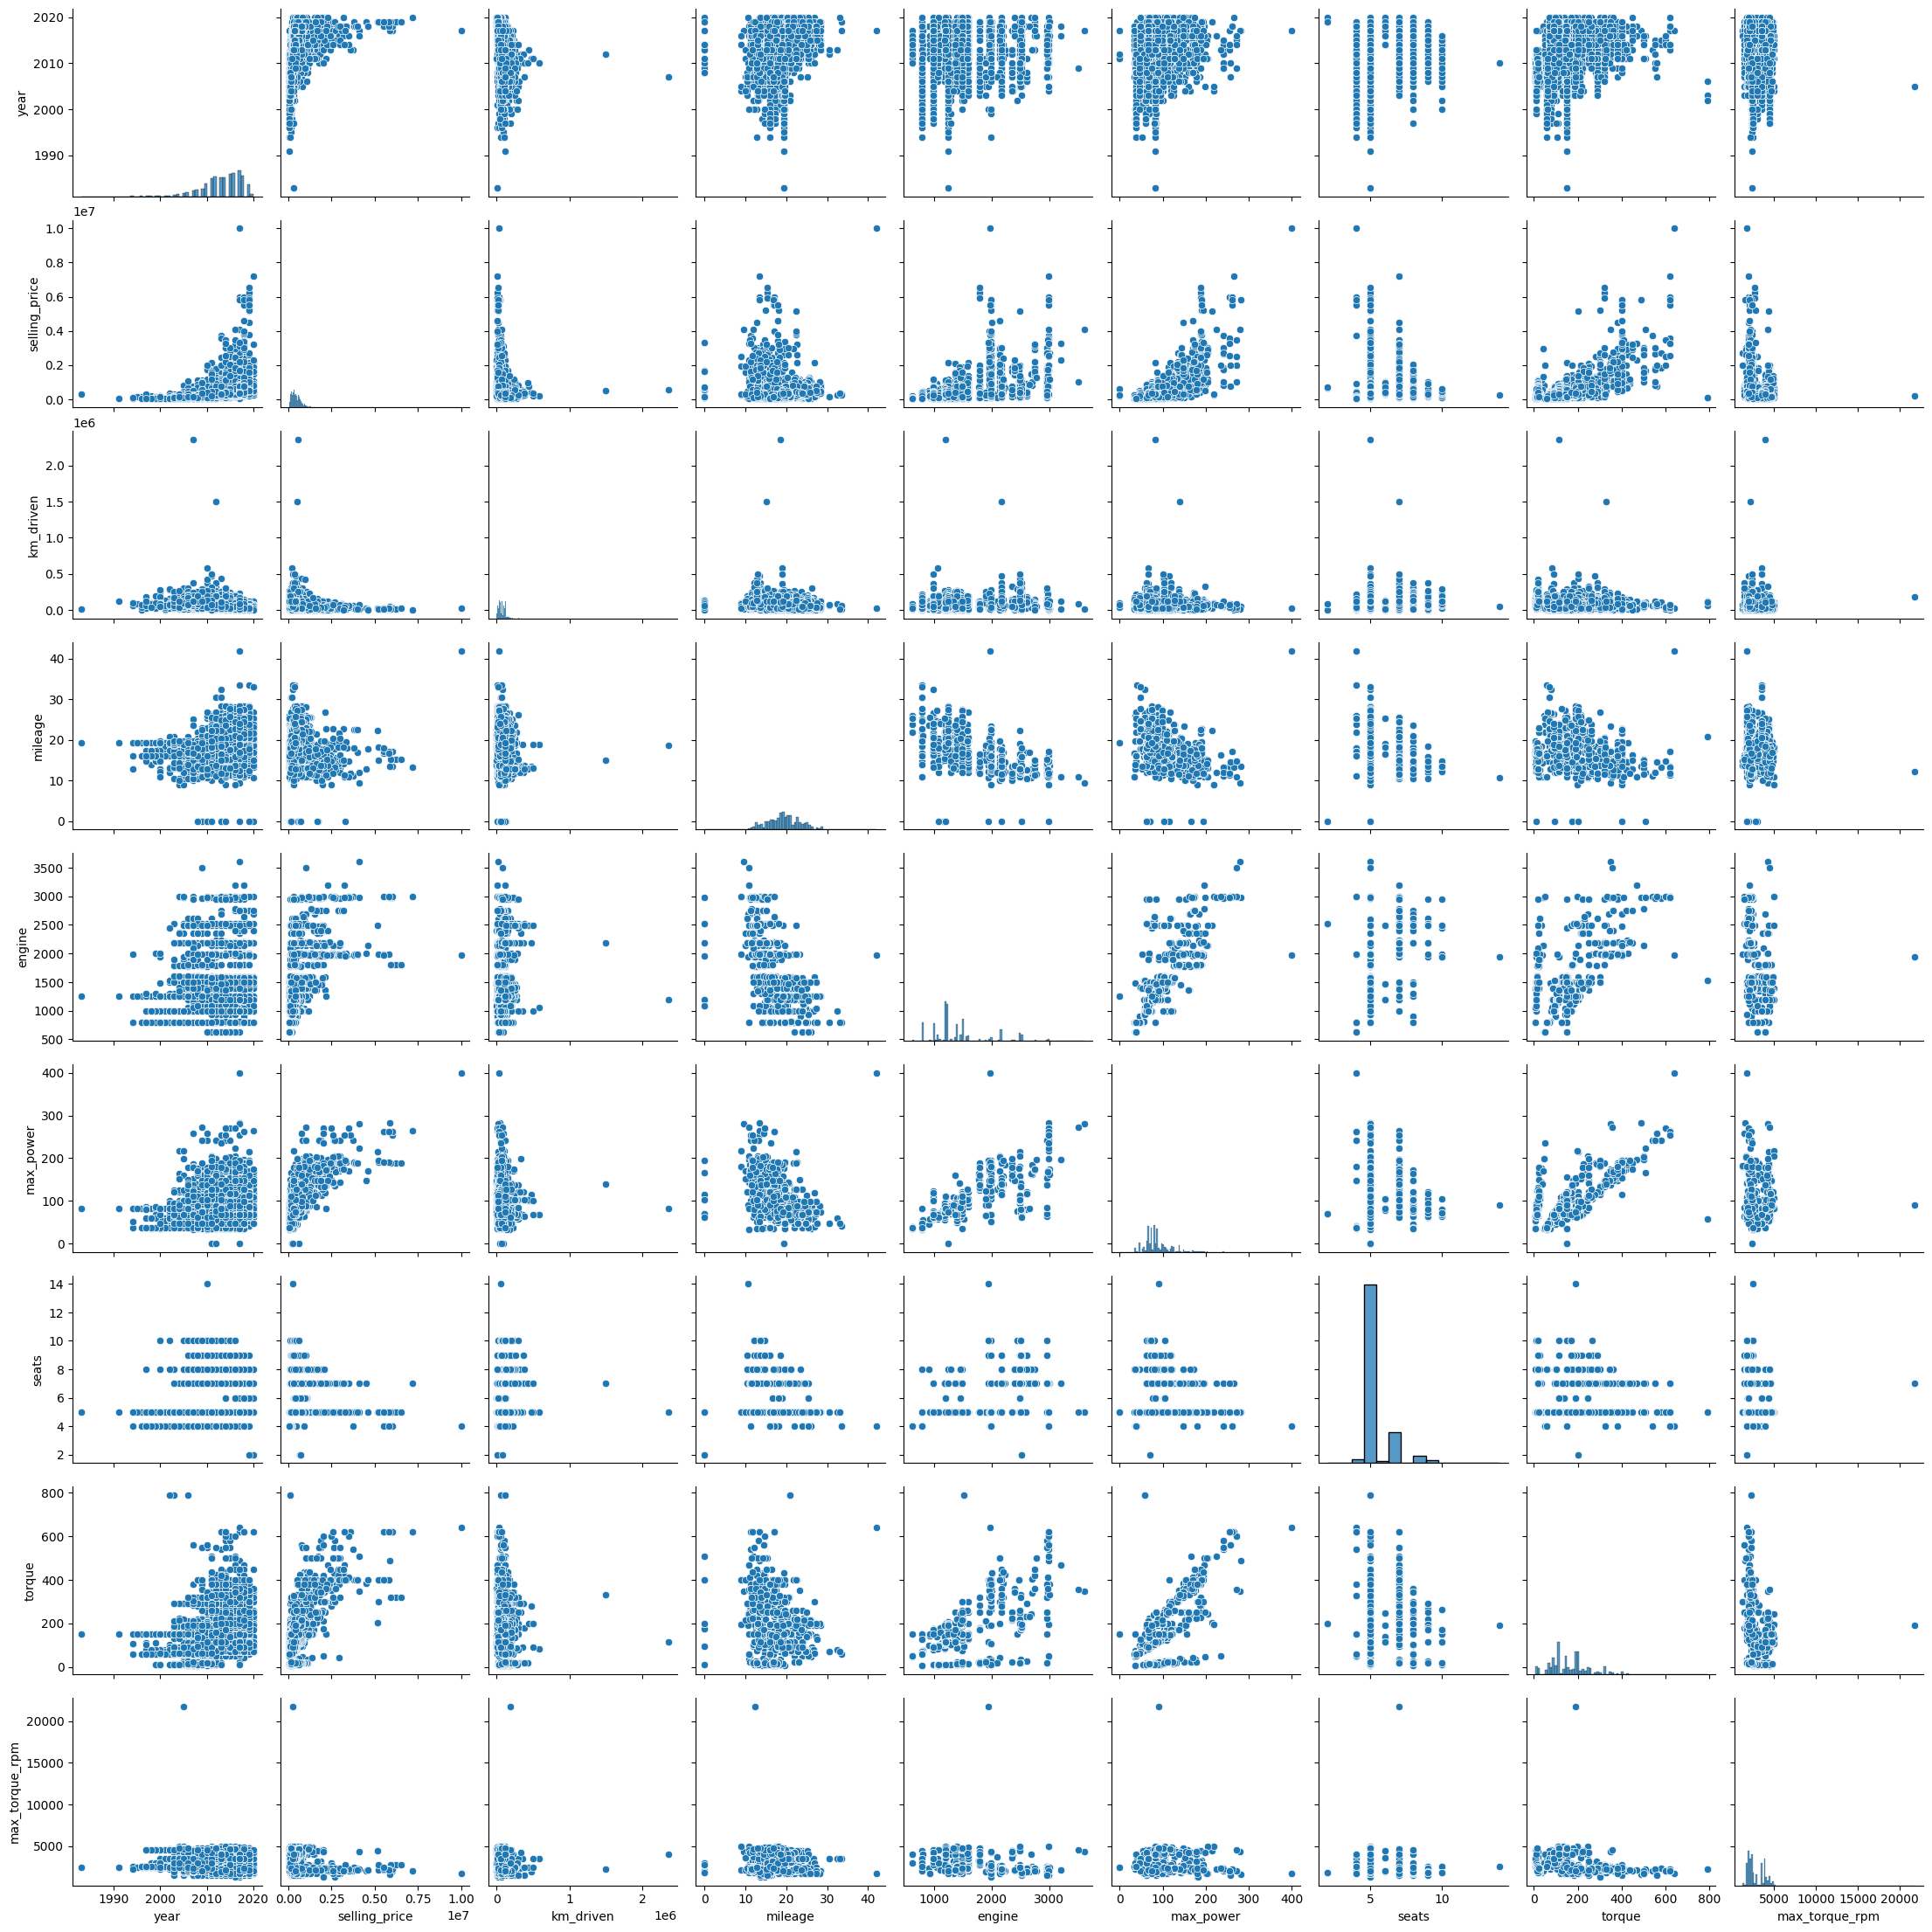

In [654]:
sns.pairplot(df_train)

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?</font>

`selling_price` обратно коррелирует с `year` автомобиля: чем больше год, тем меньше цена.
<br/>
`selling_price` обратно коррелирует с пробегом (`km_driven`): чем больше пробег, тем меньше цена.
<br/>
Расход (`mileage`) и количество сидений (`seats`) похоже особенно не влияет на таргет.
<br/>
Позитивно на `selling_price` влияет `max_power`, `engine` и `torque`.

* <font color='#FF6600'> А о корреляциях признаков? </font>

Есть взаимосвязь между некоторыми предикторами. Например `engine` коррелирует с `max_power` и `torque`. Они (`torque` и `max_power`) между собой тоже коррелируют.

`engine` обратно коррелирует с `mileage`

(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

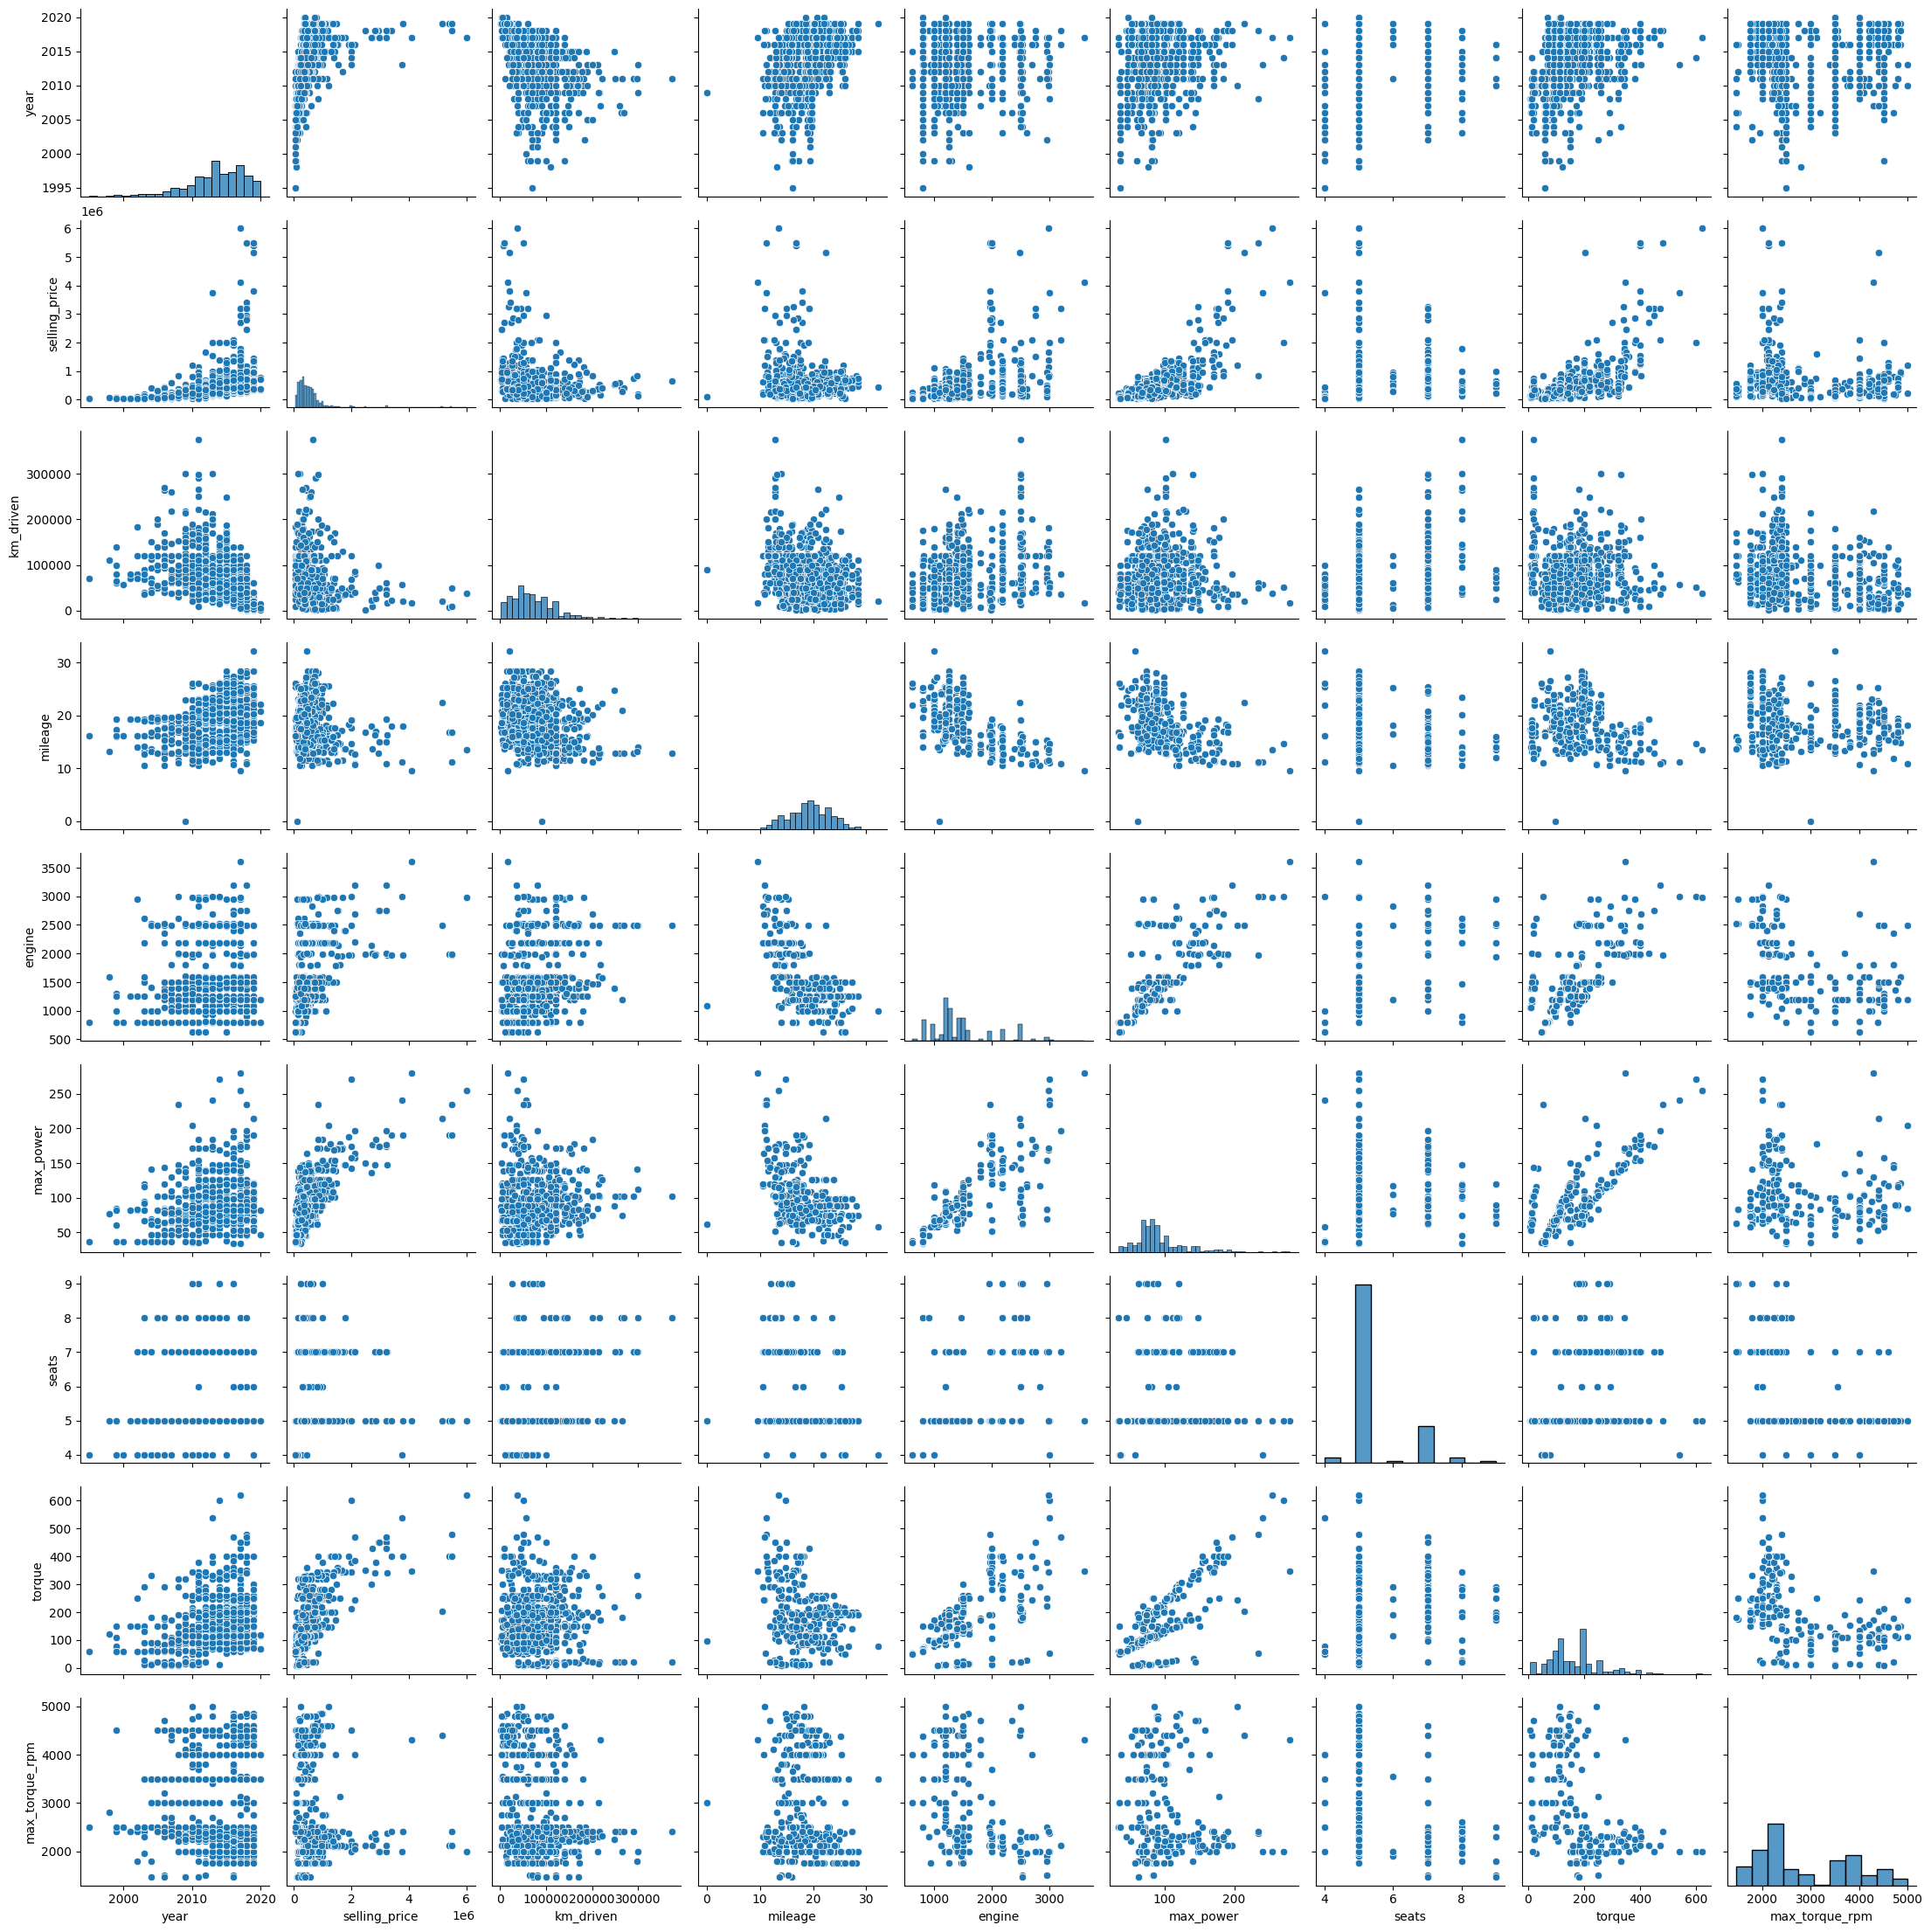

In [655]:
sns.pairplot(df_test)

(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

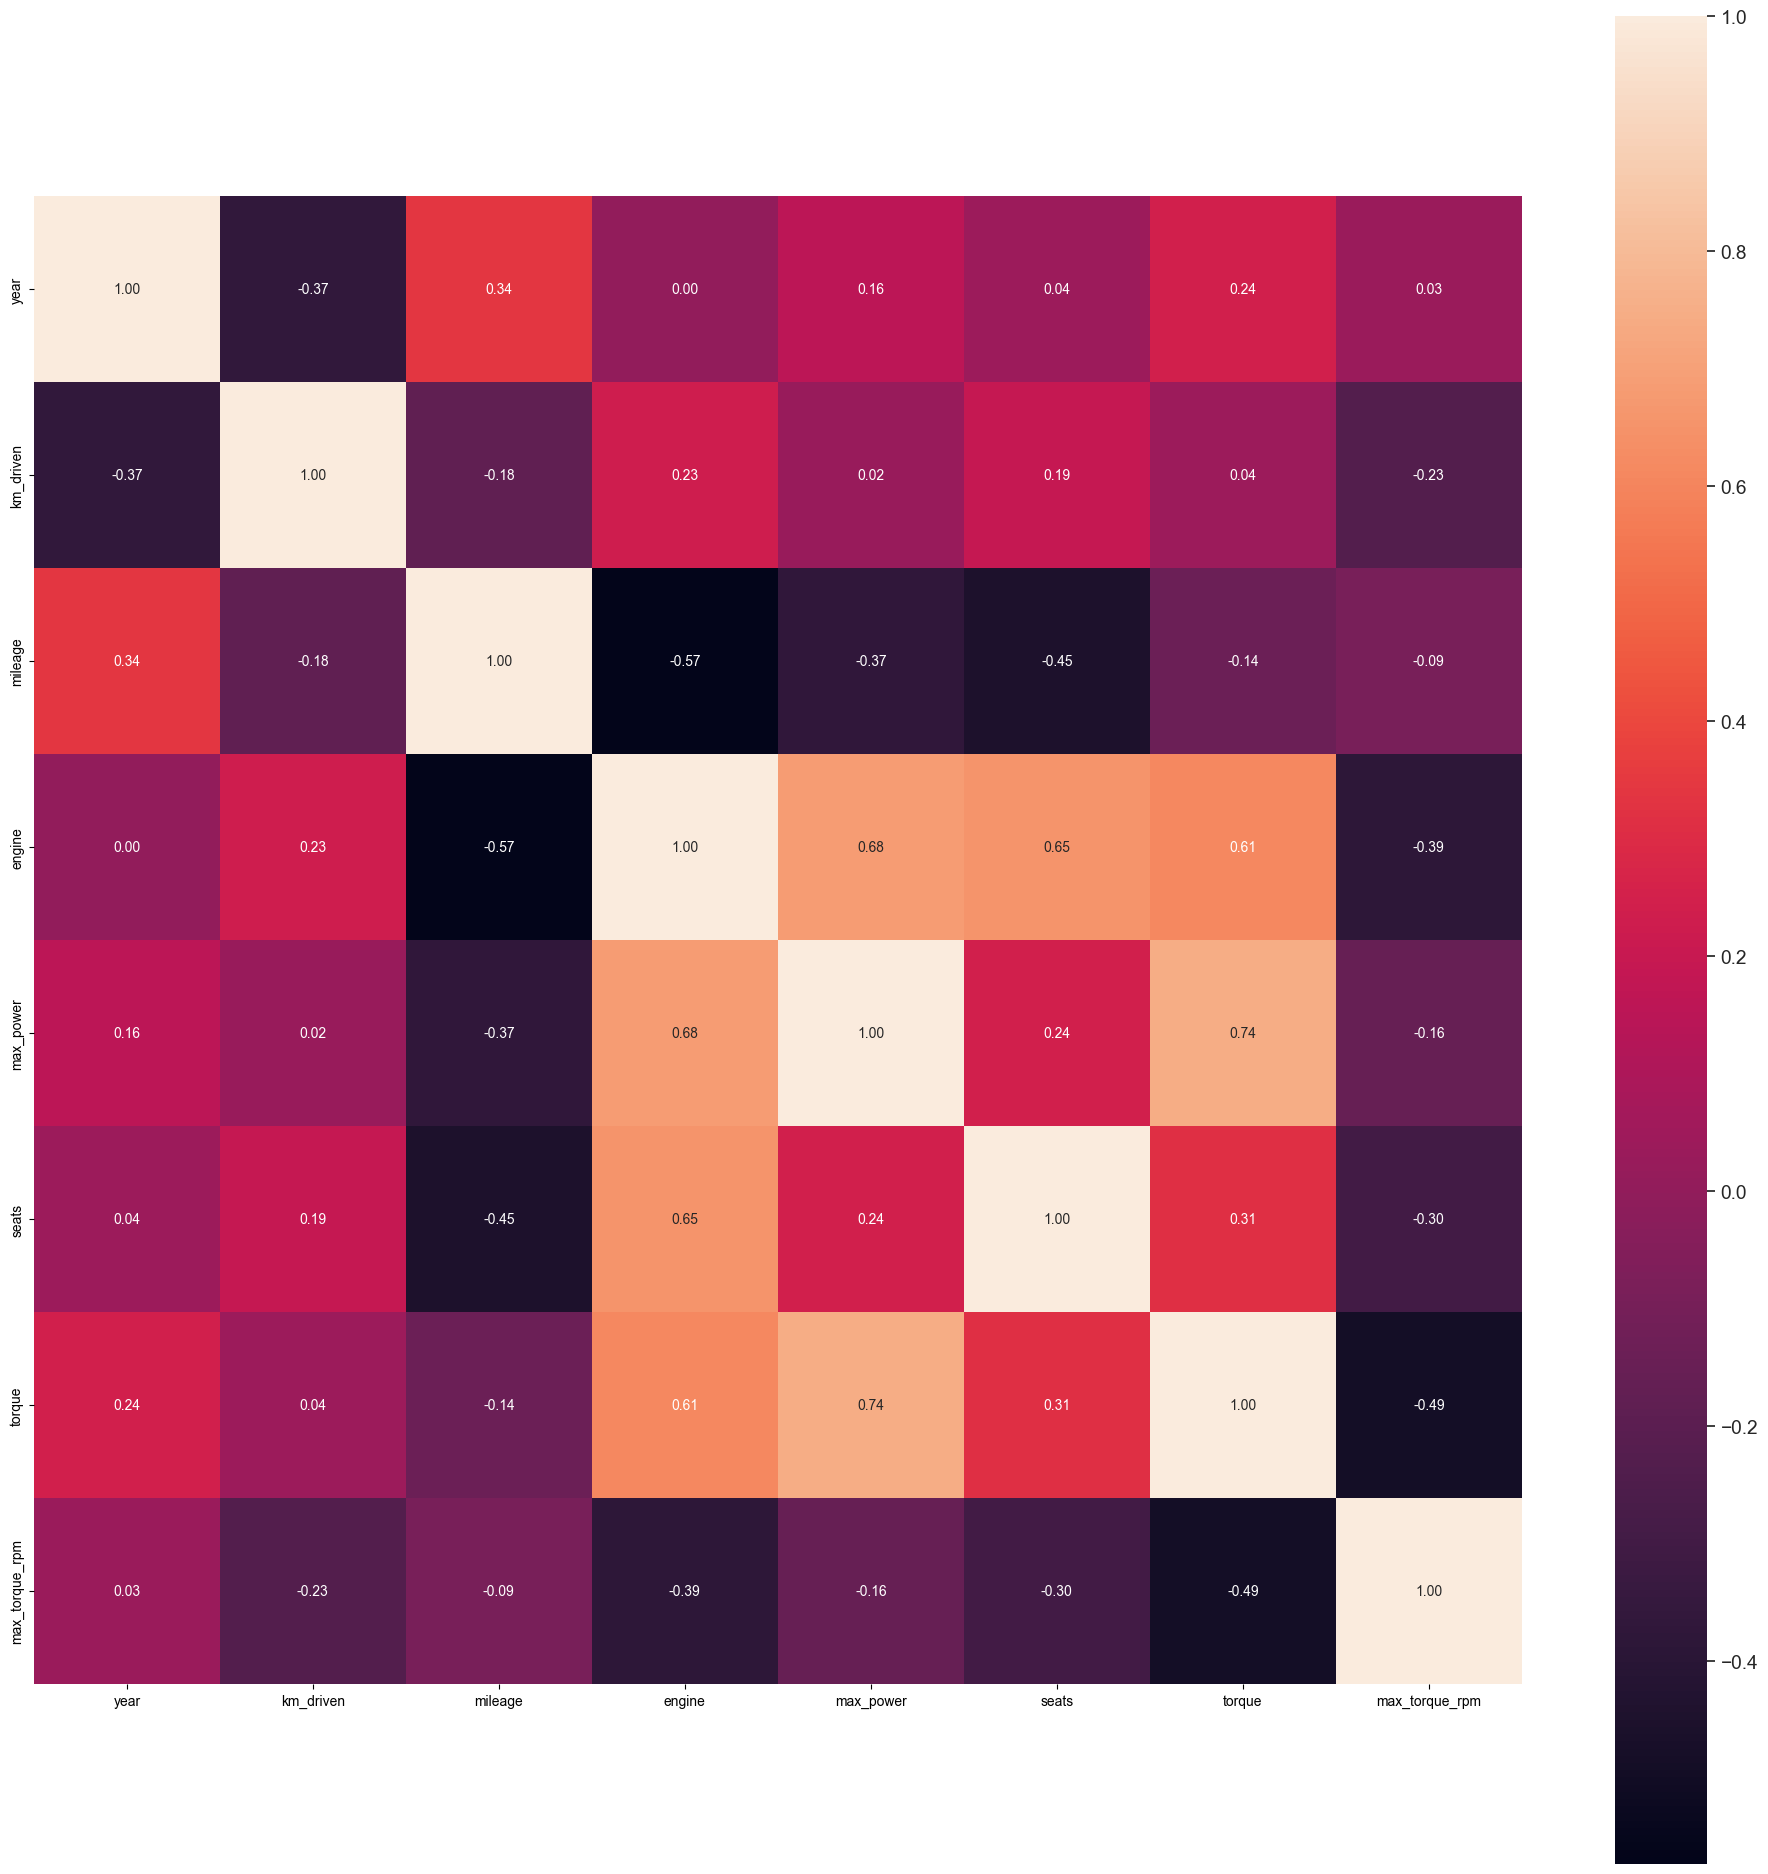

In [656]:

numerical_features = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'torque', 'max_torque_rpm']
corr_matrix = df_train[numerical_features].corr()
k = 45
cols = corr_matrix.index
cm = np.corrcoef(df_train[cols].values.T.astype(float))
plt.subplots(figsize=(24,24));
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, 
                 fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>

`engine` и `year`

* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>

`torque` и `max_power`
<br/>
`torque` и `engine`
<br/>
`seats` и `engine`

* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

Скорее нет чем да. Есть отрицательная корреляциях (ее значение -0.37). Те обратное утверждение имеет смысл: чем меньше год, тем меньше пробег.



(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

<AxesSubplot: xlabel='max_power', ylabel='torque'>

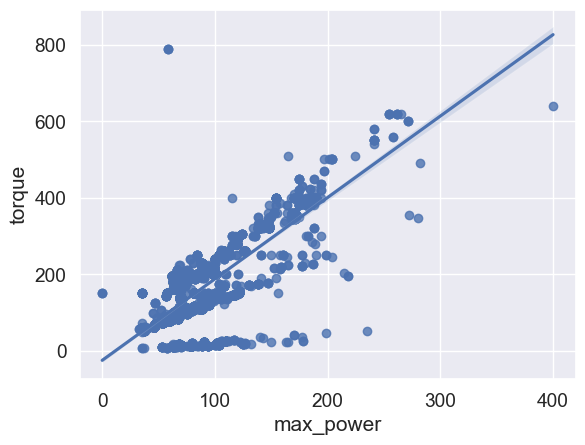

In [657]:
sns.regplot(x="max_power", y="torque", data=df_train)

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

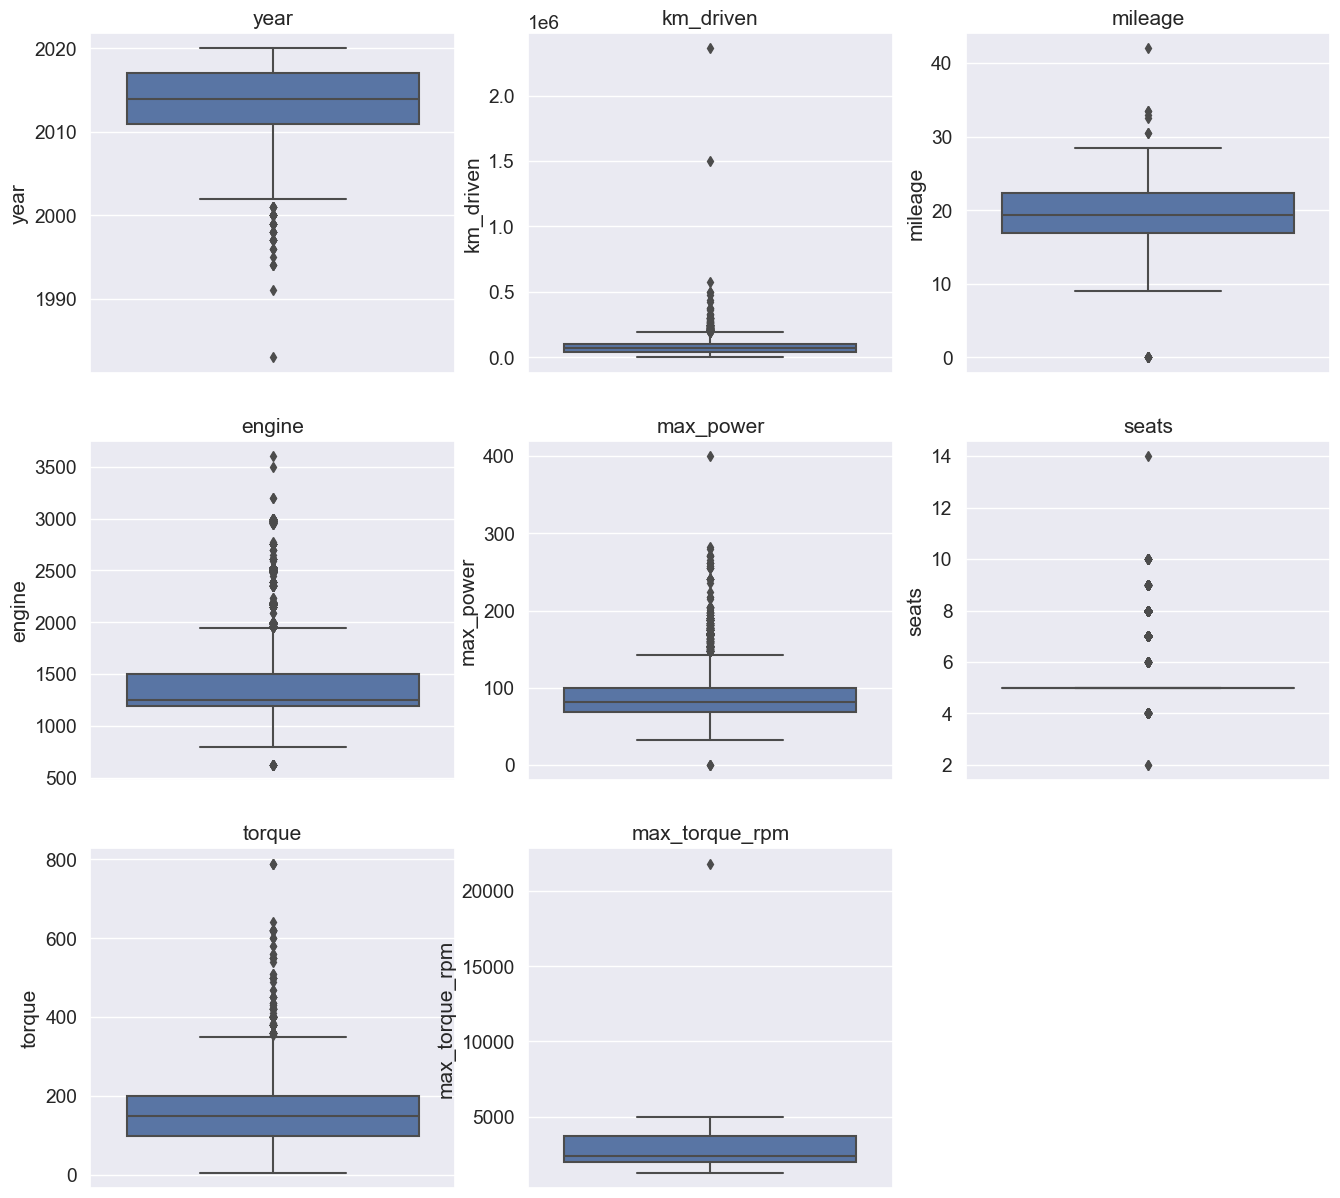

In [658]:
fig = plt.figure(figsize=(16, 5 * n_rows))
#fig.suptitle('Boxplot for numerical variables')

i = 1
for col in numerical_features:
    ax = fig.add_subplot(n_rows, n_cols, i)
    sns.boxplot(y=col, data=df_train)
    ax.set_title(col)
    i += 1

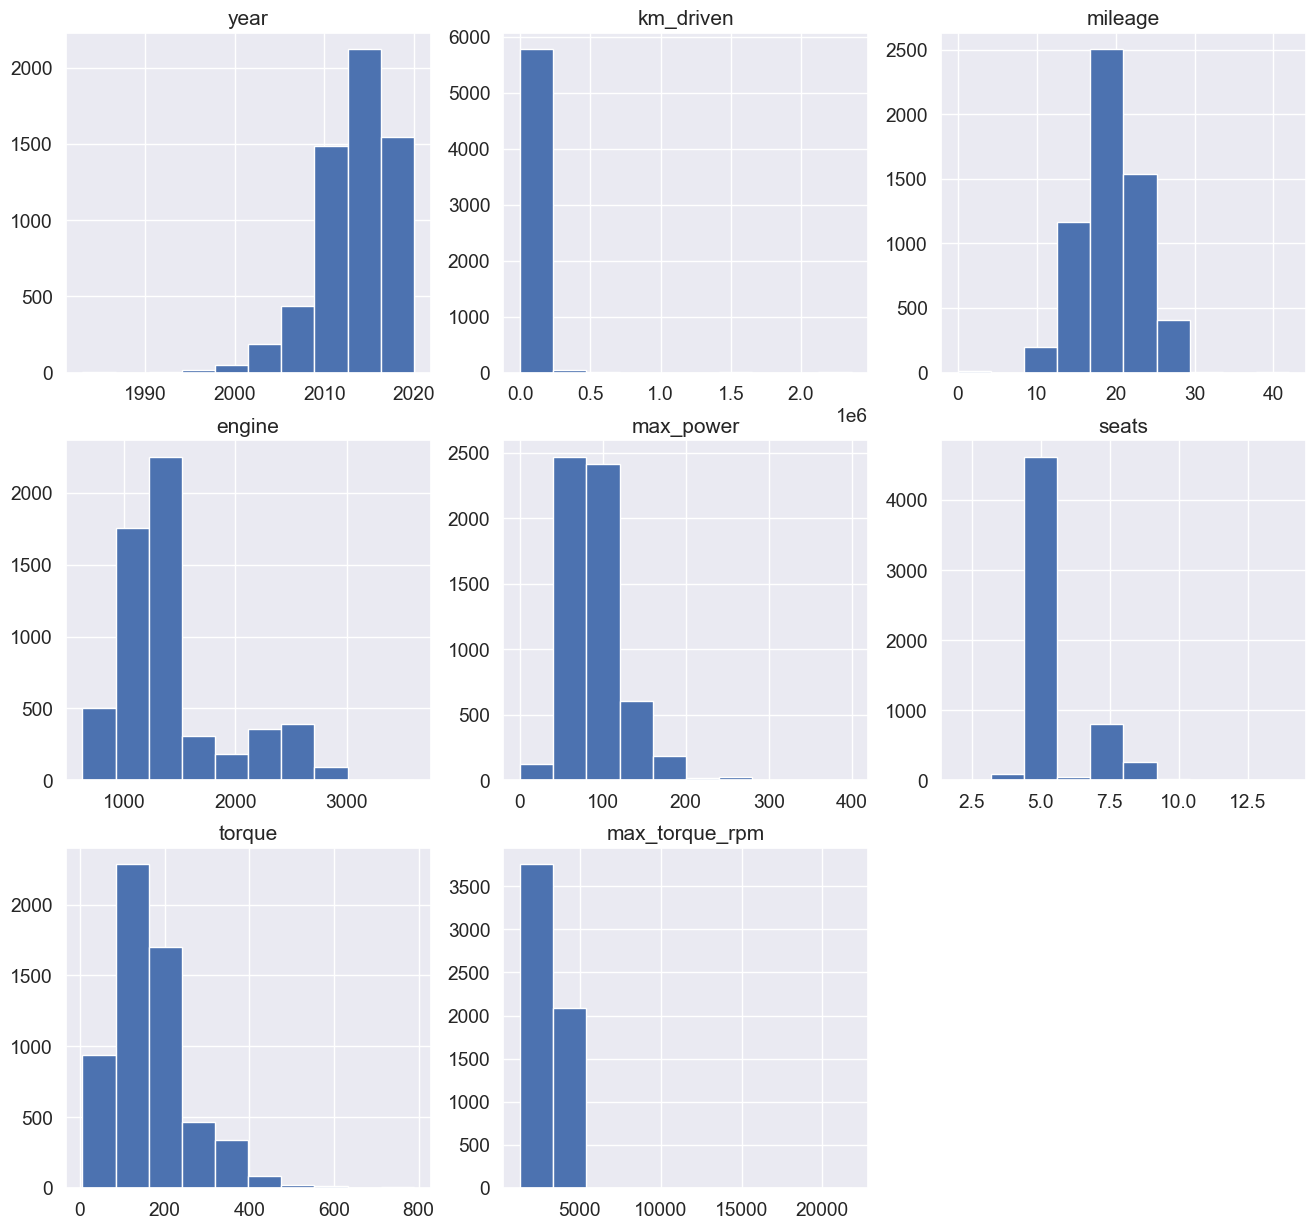

In [660]:
n = len(numerical_features)
n_cols = 3
n_rows = n // n_cols + min(1, n % n_cols)

fig = plt.figure(figsize=(16, 5 * n_rows))

i = 1
for col in numerical_features:
    ax = fig.add_subplot(n_rows, n_cols, i)
    df_train[col].hist()
    ax.set_title(col)
    i += 1

<AxesSubplot: title={'center': 'owner'}>

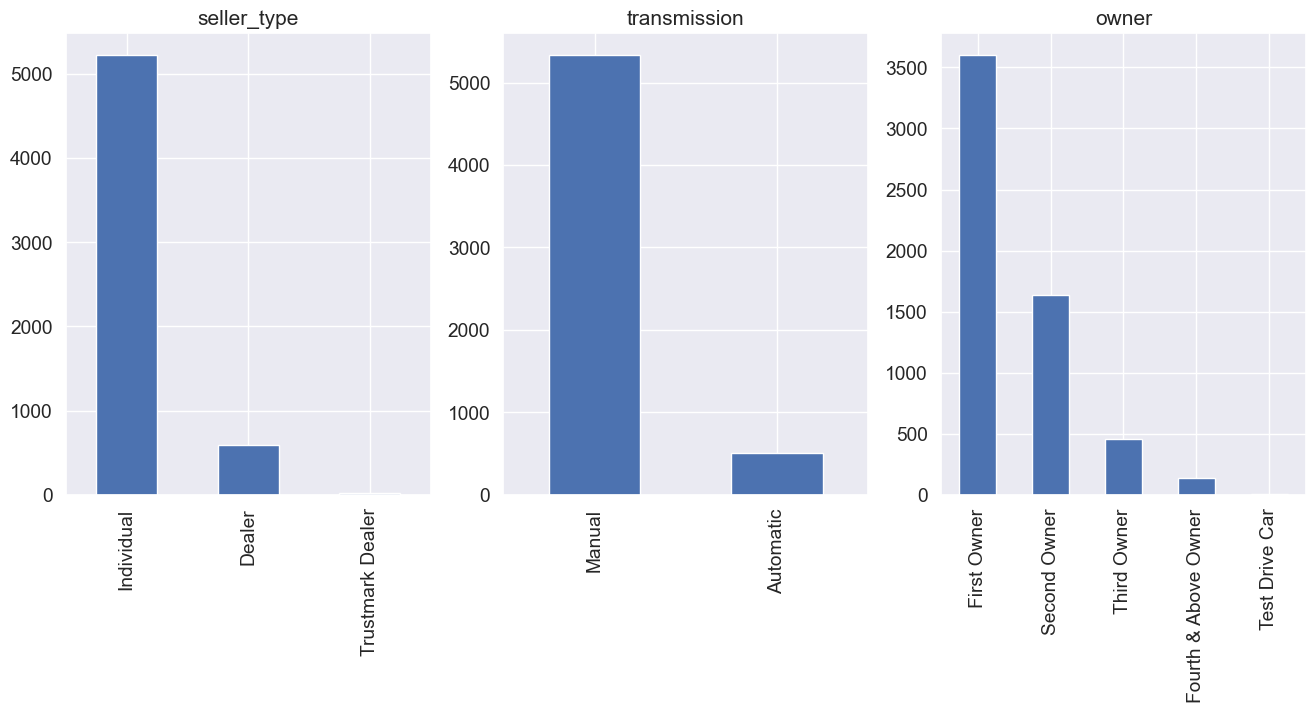

In [667]:
fig = plt.figure(figsize=(16,6))

n_cols = 3
n_rows = 1

ax = fig.add_subplot(n_rows, n_cols, 1)
df_train['seller_type'].value_counts().plot(kind='bar', title='seller_type')

ax = fig.add_subplot(n_rows, n_cols, 2)
df_train['transmission'].value_counts().plot(kind='bar', title='transmission')

ax = fig.add_subplot(n_rows, n_cols, 3)
df_train['owner'].value_counts().plot(kind='bar', title='owner')

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [ ]:
y_train = # your code here
X_train = # your code here

In [ ]:
assert X_train.shape == (5840, 6)

In [ ]:
y_test = # your code here
X_test = # your code here

In [ ]:
assert X_test.shape == (1000, 6)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

# your code here

Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [ ]:
from sklearn.preprocessing import StandardScaler

# your code here

Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [ ]:
# your code here

(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [ ]:
from sklearn.linear_model import Lasso

# your code here

<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

In [ ]:
# your code here

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [ ]:
from sklearn.model_selection import GridSearchCV

# your code here

<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

In [ ]:
# your code here

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [ ]:
from sklearn.linear_model import ElasticNet

# your code here

<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

In [ ]:
# your code here

Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.75 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [ ]:
# your code here

In [ ]:
assert X_train_cat.shape == (5840, 10)

In [ ]:
X_train_cat.describe(include='object')

(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [ ]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

# your code here

(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# your code here

# Часть 4 - бонусная (2 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [ ]:
# your code here

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [ ]:
def business_metrics(y_true, y_pred):
    # your code here

business_metrics(# your code here)

# Часть 5 (3 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str 
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link